In [1]:
import cv2
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
import matplotlib.pyplot as plt 
from skimage.transform import resize
import numpy as np
from tensorflow.keras.layers import RepeatVector , Reshape 
from PIL import Image

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
inception = InceptionResNetV2(weights=None, include_top=True)
inception.load_weights('./data/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5')
inception.graph = tf.get_default_graph()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#To generate embeddings of 1000*1 by passing input images through InceptionResNetV2
def create_inception_embedding(grayscaled_rgb):
    grayscaled_rgb_resized = []
    for i in grayscaled_rgb:
        i = resize(i, (299, 299, 3), mode='constant')
        grayscaled_rgb_resized.append(i)
    grayscaled_rgb_resized = np.array(grayscaled_rgb_resized)
    grayscaled_rgb_resized = preprocess_input(grayscaled_rgb_resized)
    with inception.graph.as_default():
        embed = inception.predict(grayscaled_rgb_resized)
    return embed
import tensorflow as tf

In [4]:
from tensorflow import keras
model = keras.models.load_model('./color_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 128, 128, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 128, 128, 128 73856       conv2d_203[0][0]                 
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, 64, 64, 128)  147584      conv2d_204[0][0]                 
______________________________________________________________________________________________

In [6]:
# Util functions

def lab2RGB(l, ab):
    shape = (l.shape[0],l.shape[1],3)
    img = np.zeros(shape)
    img[:,:,0] = l[:,:,0]
    img[:,:,1:] = ab
    img = img.astype('uint8')
    print(img.max())
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    return img
def display(img):
    plt.figure()
    plt.set_cmap('gray')
    plt.imshow(img)
    plt.show()

def get_RGB(image_l, image_ab  ):
       
    image_l = image_l.reshape((256, 256, 1))
    image_lab = np.concatenate((image_l, image_ab), axis=2)
    image_lab = image_lab.astype("uint8")
 
    image_rgb = cv2.cvtColor(image_lab, cv2.COLOR_LAB2RGB)
    image_rgb = Image.fromarray(image_rgb)
    return image_rgb





In [25]:
def get_rgb_prediction(img_path):
    test_img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    print (rgb_img.shape)

    display(rgb_img)

    img_lab = rgb2lab(test_img)
    img_lab = resize(img_lab, (256, 256, 3), mode='constant')
    
    img_lab = np.array(img_lab)
    
    img_lab_one = img_lab

    img_l = img_lab_one[:, :, 0]
    img_ab = img_lab_one[:, :, 1:]
    print(img_ab)

    display(img_l)

    incept_em = create_inception_embedding([img_l])
    embeddings = RepeatVector(32 * 32)(incept_em)
    layer_embedding_test = Reshape(([32, 32, 1000]))(embeddings)

    img_l = img_l.reshape((1, 256, 256, 1))

    output = model.predict([img_l,layer_embedding_test], steps=1)

    output = output * 128
    print(output)
    pred_rgb = get_RGB(img_l[0],output[0])
   
    return pred_rgb

(256, 256, 3)


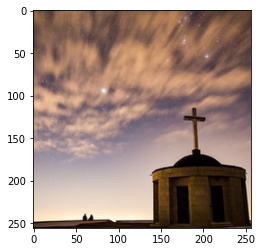

[[[  1.07455206 -25.10590098]
  [  0.90814621 -24.97438381]
  [  0.19143114 -23.84417509]
  ...
  [  3.46141338 -20.79608546]
  [  4.70575144 -21.02990593]
  [  5.1982011  -21.5321592 ]]

 [[  1.03162514 -25.07272543]
  [  0.90814621 -24.97438381]
  [  0.83000414 -24.90980437]
  ...
  [  3.63231663 -20.97574712]
  [  4.87875687 -21.21578478]
  [  5.07156914 -21.41066034]]

 [[  1.34767247 -26.16615147]
  [  0.39715341 -25.16247853]
  [  0.27564563 -25.06740723]
  ...
  [  3.94999054 -21.28083897]
  [  4.165256   -20.44774408]
  [  4.08918395 -20.37107886]]

 ...

 [[ -0.16673316 -17.29358335]
  [ -0.06288371 -17.3901154 ]
  [  1.02704258 -18.53823119]
  ...
  [  2.32437816  -8.86775341]
  [  1.36890875  -8.96236006]
  [  0.74989571  -7.23913874]]

 [[ -0.67488146 -11.51431197]
  [  0.96679281 -12.33600683]
  [  1.9955909  -13.49034376]
  ...
  [  2.07130373 -13.59065185]
  [  1.3513406  -13.77553025]
  [ -0.05103719 -13.41647201]]

 [[  0.96555282  -5.84327355]
  [  1.20175113  -7.2899

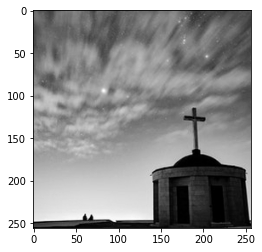

[[[[25.013397  30.665665 ]
   [25.013397  30.665665 ]
   [42.390774  44.582397 ]
   ...
   [39.041573  32.31537  ]
   [24.73908   29.356266 ]
   [24.73908   29.356266 ]]

  [[25.013397  30.665665 ]
   [25.013397  30.665665 ]
   [42.390774  44.582397 ]
   ...
   [39.041573  32.31537  ]
   [24.73908   29.356266 ]
   [24.73908   29.356266 ]]

  [[33.179974  51.701263 ]
   [33.179974  51.701263 ]
   [45.951622  60.448997 ]
   ...
   [47.84002   36.646732 ]
   [34.235275  41.296764 ]
   [34.235275  41.296764 ]]

  ...

  [[35.23262   37.17037  ]
   [35.23262   37.17037  ]
   [36.43415   49.465134 ]
   ...
   [30.41459    6.7059474]
   [24.816486   6.0305696]
   [24.816486   6.0305696]]

  [[35.10829   24.14717  ]
   [35.10829   24.14717  ]
   [36.030743  41.74928  ]
   ...
   [24.01883   14.33778  ]
   [15.645013   7.200675 ]
   [15.645013   7.200675 ]]

  [[35.10829   24.14717  ]
   [35.10829   24.14717  ]
   [36.030743  41.74928  ]
   ...
   [24.01883   14.33778  ]
   [15.645013   7.20067

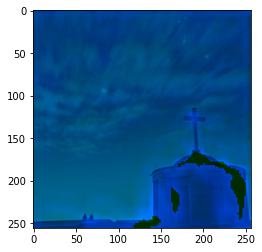

In [26]:
rgb_prediction = get_rgb_prediction('./data/images/Train/0AEYvu.jpg')
display(rgb_prediction)